## Preliminaries

In [1]:
from scipy import stats
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt

## Question 1

### Question 1a

High dimensional Gaussian Distribution:

L2 distance between each sample and the origin. Plot the distances in a **histogram**. K = 1000, n = 1 ~ 500.


As the number of dimensions grow, the histogram becomes sharper. This means that all samples are at the same distance from the origin, i.e. they lie in a thin spherical shell.

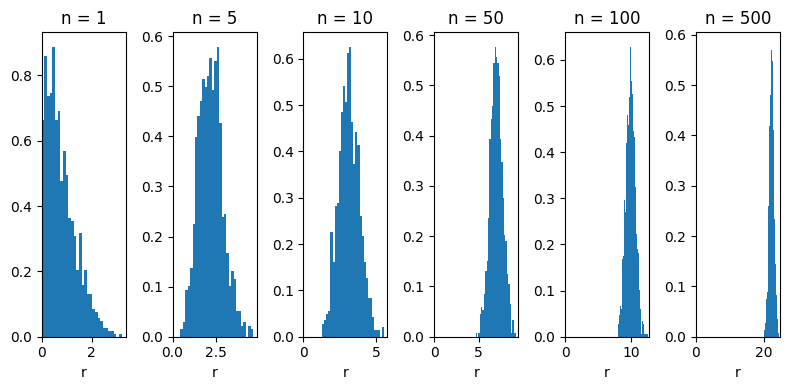

In [15]:
k = 1000
n_vec = [1, 5, 10,50,100,500]
plt.figure(figsize=(8,4))
for i,n in enumerate(n_vec):
  plt.subplot(1, len(n_vec), i+1)
  X = rn.randn(k,n)
  r = np.linalg.norm(X, axis=1)
  plt.hist(r, bins=30, density=True)
  plt.xlabel('r')
  plt.title(f'n = {n}')
  plt.xlim(left=0)
plt.tight_layout()


### Question 1b

Evaluate the likelihood (prob density) under the same gaussian distribution of each sample, and of the mode of the distribution.

- the average likelihood (probablity density function `pdf()`) of the samples
- the likelihood of the mode of the distribution

We can re-use the samples `X` and dimensions `n` from the previous question, and evaluate the likelihood with any suitable library (either compute explicitly with `numpy` or use e.g. `scipy.stats`. We can learn two lessons from this:

1. The likelihood of the mode is much higher than the likelihood of typical samples; but
1. Even then, the likelihood of the mode is really tiny. Therefore, sampling a point around the origin is very unlikely (because there is very little volume).

In [17]:
mvn = stats.multivariate_normal(mean=np.zeros(n), cov=np.eye(n))   # multivariate gaussian distribution
print(f'Average likelihood of samples: {mvn.pdf(X).mean()}')
print(f'Likelihood of mode: {mvn.pdf(np.zeros(n)).mean()}')

Average likelihood of samples: 9.707340090913008e-292
Likelihood of mode: 2.8512343234609535e-200


## Question 2   Examples for AEP and typical sets



As dictated by the AEP, the probability of long strings of IID samples converges to the entropy with vanishing variance. That is, the average log-probability of the strings becomes very close to the entropy of the distribution. As $n$ increases, almost all the samples fit into a narrow $ɛ$ interval around the entropy $H$.

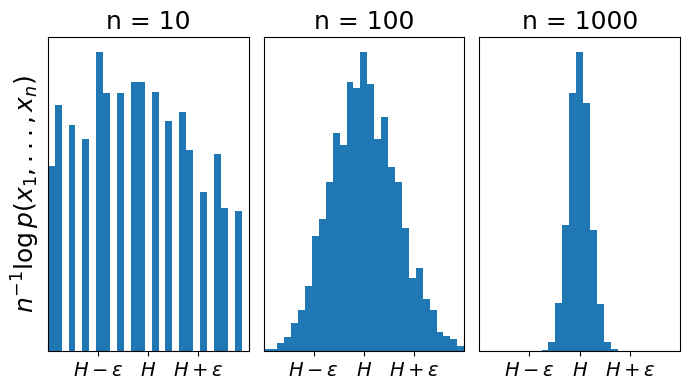

In [8]:
n_vec = [10, 100, 1000]
k = 5000
eps = 0.15
figlim = 2

# For a geometric distribution
dist, params = stats.geom, {'p': 0.3}
# For a binomial distribution
# dist, params = stats.binom, {'n': 20, 'p': 0.05}

H = dist.entropy(**params)
plt.figure(figsize=(7,4))
for i,n in enumerate(n_vec):
  samples = dist.rvs(**params, size=(n,k))
  prob = dist.pmf(samples, **params)
  ax = plt.subplot(1,3,i+1)
  plt.hist(-np.log(prob).mean(axis=0), density=True, bins=np.linspace(H-figlim*eps, H+figlim*eps, 30))
  ax.set_yticks([])
  ax.set_title(f'n = {n}', fontsize=18)
  ax.set_xticks([H-eps, H, H+eps], labels=['$H-\epsilon$', '$H$', '$H+\epsilon$'], fontsize=14)
  ax.set_xlim((H-figlim*eps, H+figlim*eps))
  if i == 0:
    ax.set_ylabel('$n^{-1} \log p(x_1, ..., x_n)$', fontsize=18)
plt.tight_layout()
plt.show()